In [1]:
pip install mrjob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\hinge\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('forestfires.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
from mrjob.job import MRJob

In [6]:
import sys
sys.argv = ['avg_temperature.py', 'forestfires.csv']

In [7]:

!pip install pyhive pandas seaborn matplotlib
!pip install thrift thrift-sasl pyhive pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Group by month and count occurrences
monthly_count = df.groupby('month').size().reset_index(name='count')
print(monthly_count)

   month  count
0    apr      9
1    aug    184
2    dec      9
3    feb     20
4    jan      2
5    jul     32
6    jun     17
7    mar     54
8    may      2
9    nov      1
10   oct     15
11   sep    172


In [9]:
# Perform other aggregations or queries
temperature_avg = df.groupby('month')['temp'].mean()
print(temperature_avg)

month
apr    12.044444
aug    21.631522
dec     4.522222
feb     9.635000
jan     5.250000
jul    22.109375
jun    20.494118
mar    13.083333
may    14.650000
nov    11.800000
oct    17.093333
sep    19.612209
Name: temp, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

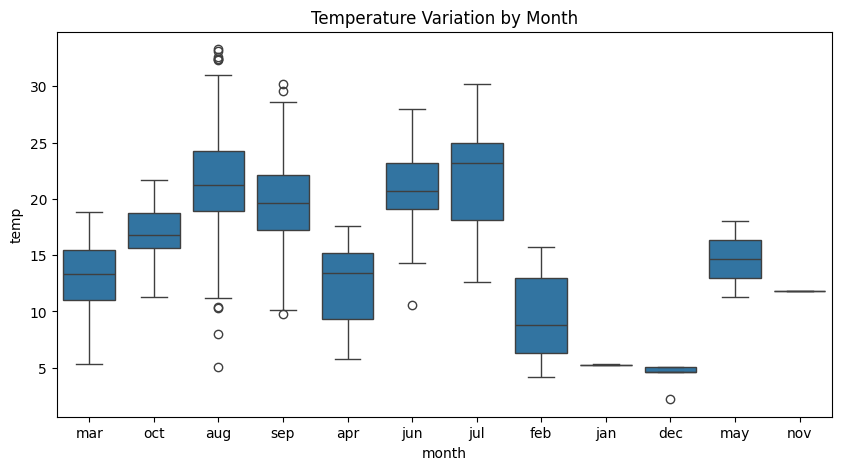

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['temp'])
plt.title("Temperature Variation by Month")
plt.show()

In [12]:
import sqlite3

In [13]:
# Create/Connect to SQLite database
conn = sqlite3.connect('forestfires.db')
# Write the DataFrame to the SQLite database
df.to_sql('forestfires', conn, if_exists='replace', index=False)
# Optional: Check if data is loaded correctly
cursor = conn.cursor()
cursor.execute("SELECT * FROM forestfires LIMIT 5")
data = cursor.fetchall()
print(data)
# Close the connection
conn.close()

[(7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0), (7, 4, 'oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0), (7, 4, 'oct', 'sat', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0), (8, 6, 'mar', 'fri', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0), (8, 6, 'mar', 'sun', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0)]
